In [1]:
# Final Project
# Data:epa_everglades_emap_2014_data.csv

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Open/read file and create dataframe
dataset = pd.read_csv("epa_everglades_emap_2014_data.csv", sep=",")
#print(dataset.head())

In [2]:
#Means of Variables

namean = dataset['FNO3SWFB'].mean()
nomean = dataset['TNSWFB'].mean()
hgmean = dataset['THGSWFC'].mean()
pmean = dataset['TPSWFB'].mean()
mhgmean = dataset['MEHGSDFC'].mean()
chlmean = dataset['CHLASWFB'].mean()
chlmean = chlmean / 10 #convert from microgram/L to milligram/L
smean = dataset['SO4SWEA'].mean()

#Medians of Variables

named = dataset['FNO3SWFB'].median()
nomed = dataset['TNSWFB'].median()
hgmed = dataset['THGSWFC'].median()
pmed = dataset['TPSWFB'].median()
mhgmed = dataset['MEHGSDFC'].median()
chlmed = dataset['CHLASWFB'].median()
chlmed = chlmed / 10 #convert from microgram/L to milligram/L
smedian = dataset['SO4SWEA'].median()

#Standard Deviations of Variables

nastd = dataset['FNO3SWFB'].std()
nostd = dataset['TNSWFB'].std()
hgstd = dataset['THGSWFC'].std()
pstd = dataset['TPSWFB'].std()
mhgstd = dataset['MEHGSDFC'].std()
chlstd = dataset['CHLASWFB'].std()
chlstd = chlstd / 10 #convert from microgram/L to milligram/L
sstd = dataset['SO4SWEA'].std()

#Print results:
#print("Nitrate \n")
#print("Mean: ", namean, " Median: ", named, " Standard Deviation: ", nastd, "\n")
#print("Nitrogen \n")
#print("Mean: ", nomean, " Median: ", nomed, " Standard Deviation: ", nostd, "\n")
#print("Mercury \n")
#print("Mean: ", hgmean, " Median: ", hgmed, " Standard Deviation: ", hgstd, "\n")
#print("Phosphorous \n")
#print("Mean: ", pmean, " Median: ", pmed, " Standard Deviation: ", pstd, "\n")
#print("Methylmercury \n")
#print("Mean: ", mhgmean, " Median: ", mhgmed, " Standard Deviation: ", mhgstd, "\n")
#print("Chlorophyll-A \n")
#print("Mean: ", chlmean, " Median: ", chlmed, " Standard Deviation: ", chlstd, "\n")



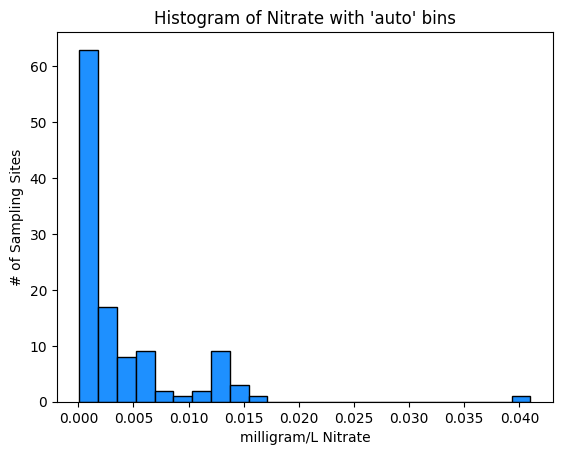

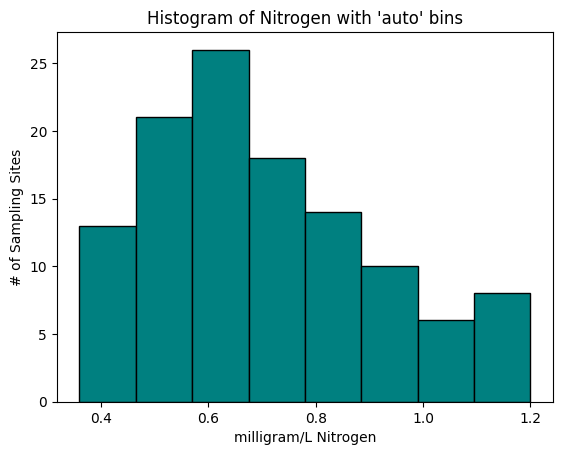

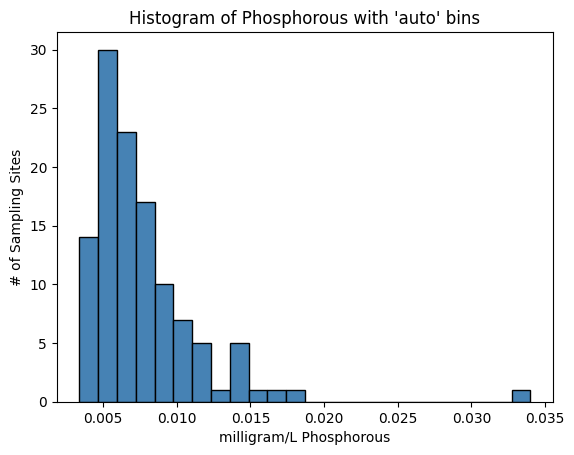

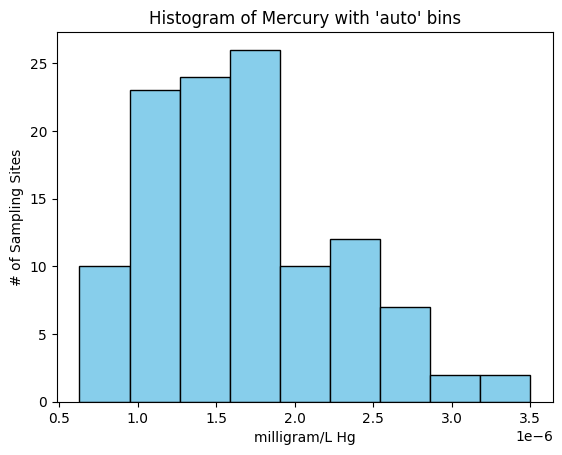

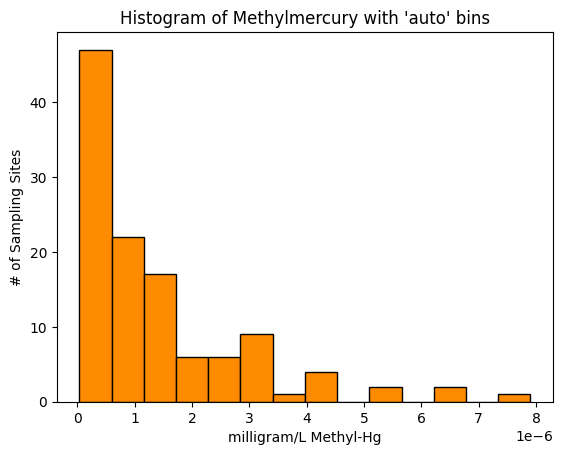

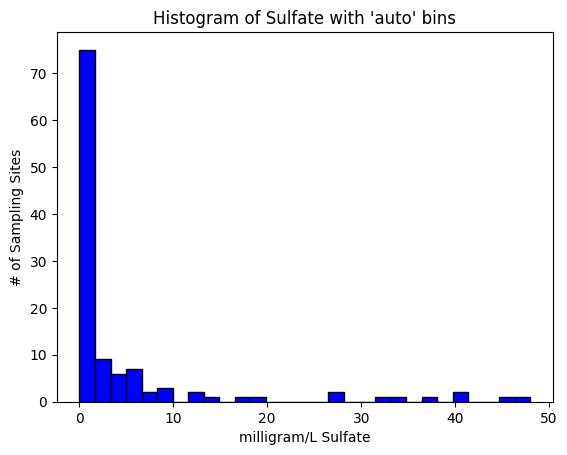

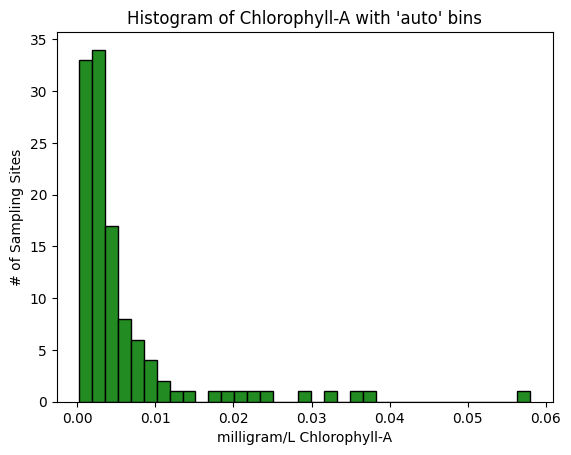

In [3]:
# Histograms for important variables
# Nitrate
plt.hist(dataset['FNO3SWFB'], bins="auto", color='dodgerblue', edgecolor='black')  # Generate histogram
title="Histogram of Nitrate " + "with 'auto' bins"   # variable title

plt.xlabel("milligram/L Nitrate")
plt.ylabel("# of Sampling Sites")
plt.title(title)    # Adds title to the graph

plt.show()

#Nitrogen
plt.hist(dataset['TNSWFB'], bins="auto", color='teal', edgecolor='black')  # Generate histogram
title="Histogram of Nitrogen " + "with 'auto' bins"   # variable title

plt.xlabel("milligram/L Nitrogen")
plt.ylabel("# of Sampling Sites")
plt.title(title)    # Adds title to the graph

plt.show()

#Phosphorous
plt.hist(dataset['TPSWFB'], bins="auto", color='steelblue', edgecolor='black')  # Generate histogram
title="Histogram of Phosphorous " + "with 'auto' bins"   # variable title

plt.xlabel("milligram/L Phosphorous")
plt.ylabel("# of Sampling Sites")
plt.title(title)    # Adds title to the graph

plt.show()

#Mercury
dataset['THGSWFC'] = dataset['THGSWFC'] * 10**-6 #change untis to mg/L
plt.hist(dataset['THGSWFC'], bins="auto", color='skyblue', edgecolor='black')  # Generate histogram
title="Histogram of Mercury " + "with 'auto' bins"   # variable title

plt.xlabel("milligram/L Hg")
plt.ylabel("# of Sampling Sites")
plt.title(title)    # Adds title to the graph

plt.show()

#Methylmercury
dataset['MEHGSDFC'] = dataset['MEHGSDFC'] * 10**-6 #change untis to mg/L
plt.hist(dataset['MEHGSDFC'], bins="auto", color='darkorange', edgecolor='black')  # Generate histogram
title="Histogram of Methylmercury " + "with 'auto' bins"   # variable title

plt.xlabel("milligram/L Methyl-Hg")
plt.ylabel("# of Sampling Sites")
plt.title(title)    # Adds title to the graph

plt.show()

#Sulfate
plt.hist(dataset['SO4SWEA'], bins="auto", color='blue', edgecolor='black')  # Generate histogram
title="Histogram of Sulfate " + "with 'auto' bins"   # variable title

plt.xlabel("milligram/L Sulfate")
plt.ylabel("# of Sampling Sites")
plt.title(title)    # Adds title to the graph

plt.show()

#Chlorophyll-A
dataset['CHLASWFB'] = dataset['CHLASWFB'] * 10**-3 #change untis to mg/L
plt.hist(dataset['CHLASWFB'], bins="auto", color='forestgreen', edgecolor='black')  # Generate histogram
title="Histogram of Chlorophyll-A " + "with 'auto' bins"   # variable title

plt.xlabel("milligram/L Chlorophyll-A")
plt.ylabel("# of Sampling Sites")
plt.title(title)    # Adds title to the graph

plt.show()

In [4]:
from scipy import stats
import pandas as pd
import numpy as np

#Save data
rawdata = dataset

#List of variables of interest
var = ['FNO3SWFB', 'TNSWFB', 'TPSWFB', 'THGSWFC', 'MEHGSDFC', 'CHLASWFB', 'SO4SWEA']

#Remove NaN values to prepare for calculations
dataset.dropna(subset=['FNO3SWFB', 'TNSWFB', 'TPSWFB', 'THGSWFC', 'MEHGSDFC', 'CHLASWFB', 'SO4SWEA'], inplace=True)

#Nested for loops to find Pearson and Spearman coefficients/p-values for all combinations of var
results = []
for i in range(len(var)):
    for j in range(i + 1, len(var)):
        col1 = var[i]
        col2 = var[j] 
        #Pearson correlation
        pearson_corr, p_value_pearson = stats.pearsonr(dataset[col1], dataset[col2]) 
        #Spearman correlation
        spearman_corr, p_value_spearman = stats.spearmanr(dataset[col1], dataset[col2]) 
        #Store values in dictionary
        results.append({ 
            'X Column': col1, 
            'Y Column': col2, 
            'Pearson Correlation': pearson_corr, 
            'Pearson P-Value': p_value_pearson,
            'Spearman Correlation': spearman_corr,
            'Spearman P-Value': p_value_spearman
        }) 

# Convert dictionary to dataframe for better visualization 
results_df = pd.DataFrame(results)
#print(results_df)
pmoderate_and_high_corr = (results_df['Pearson Correlation'] > 0.3) | (results_df['Pearson Correlation'] < -0.3)
smoderate_and_high_corr = (results_df['Spearman Correlation'] > 0.3) | (results_df['Spearman Correlation'] < -0.3)

pcoeff_df = results_df[pmoderate_and_high_corr]
scoeff_df = results_df[smoderate_and_high_corr]

print('Pearson Correlation > |0.3| found in pair(s):')
print(pcoeff_df)
print('Spearman Correlation > |0.3| found in pair(s):')
print(scoeff_df)

#Drop pairs that have alpha > 0.05
psignif_df = pcoeff_df[pcoeff_df['Pearson P-Value'] < 0.05]
signif_df = scoeff_df[scoeff_df['Spearman P-Value'] < 0.05]
print('Significant Pearson Correlation')
print(psignif_df)
print('Significant Spearman Correlation')
print(signif_df)

Pearson Correlation > |0.3| found in pair(s):
   X Column  Y Column  Pearson Correlation  Pearson P-Value  \
10   TNSWFB   SO4SWEA             0.525981     1.574260e-09   
16  THGSWFC  CHLASWFB             0.326558     3.682413e-04   

    Spearman Correlation  Spearman P-Value  
10               0.50046      1.231145e-08  
16               0.37839      3.051680e-05  
Spearman Correlation > |0.3| found in pair(s):
    X Column  Y Column  Pearson Correlation  Pearson P-Value  \
10    TNSWFB   SO4SWEA             0.525981     1.574260e-09   
11    TPSWFB   THGSWFC             0.257091     5.543061e-03   
13    TPSWFB  CHLASWFB             0.188863     4.323496e-02   
14    TPSWFB   SO4SWEA             0.133890     1.537071e-01   
16   THGSWFC  CHLASWFB             0.326558     3.682413e-04   
18  MEHGSDFC  CHLASWFB             0.107328     2.535809e-01   

    Spearman Correlation  Spearman P-Value  
10              0.500460      1.231145e-08  
11              0.351868      1.151580e-04 

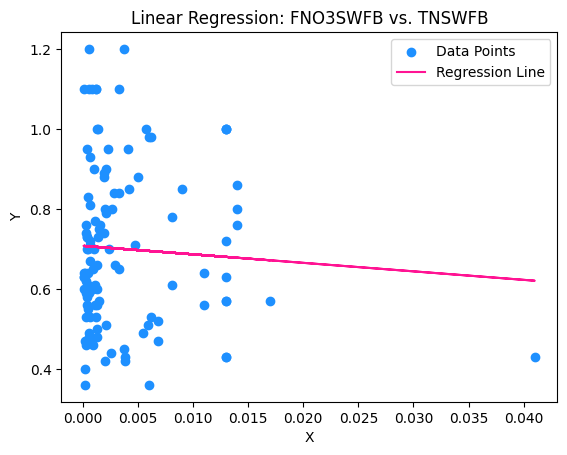

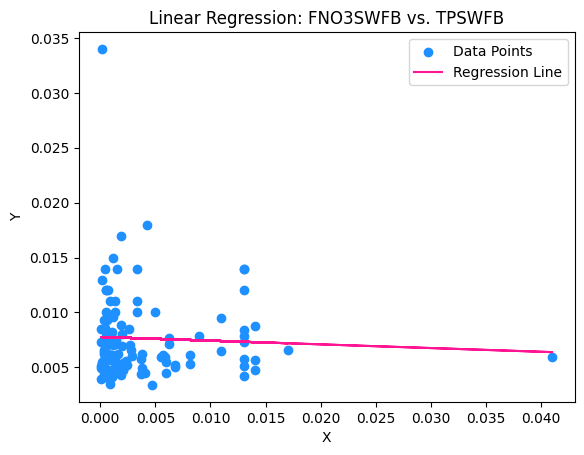

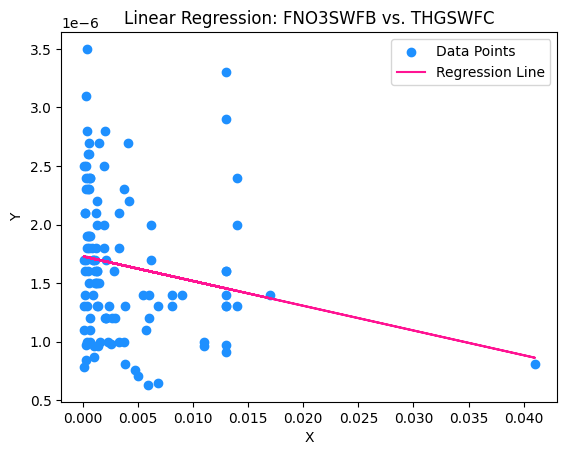

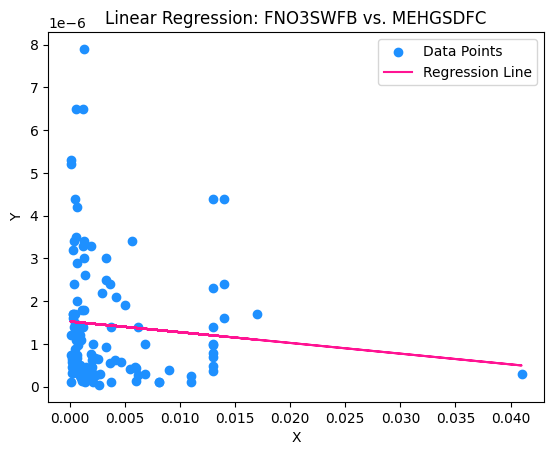

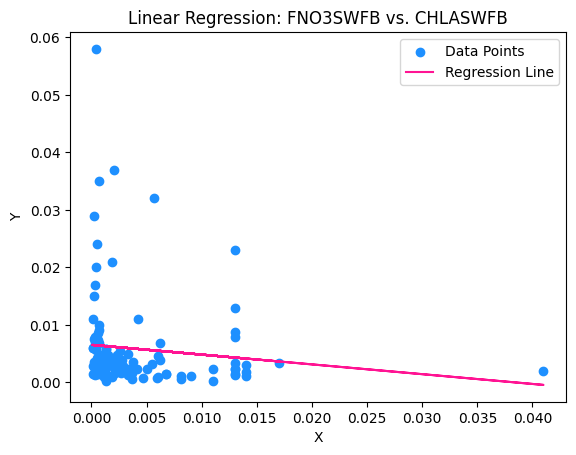

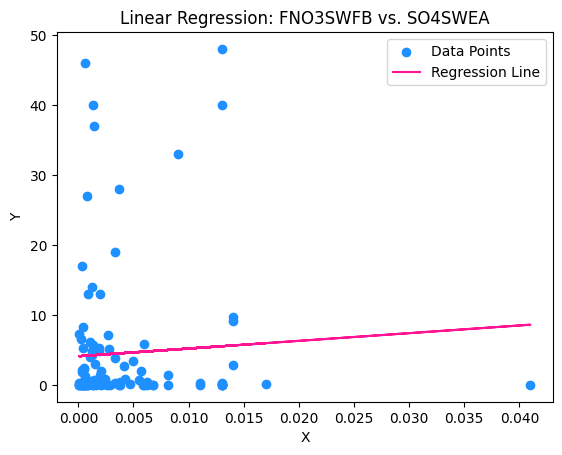

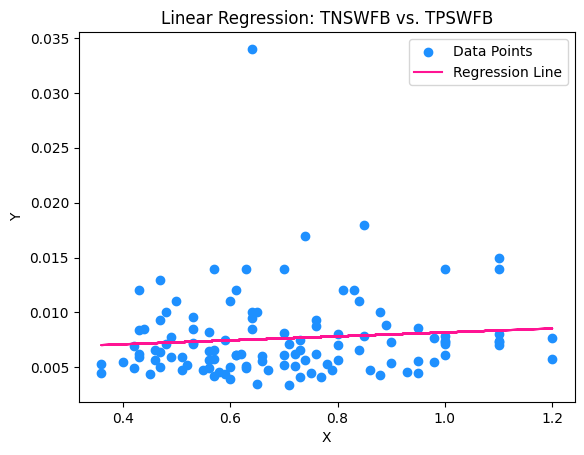

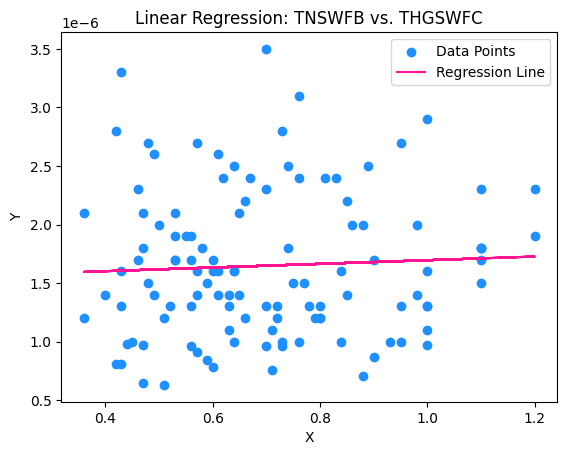

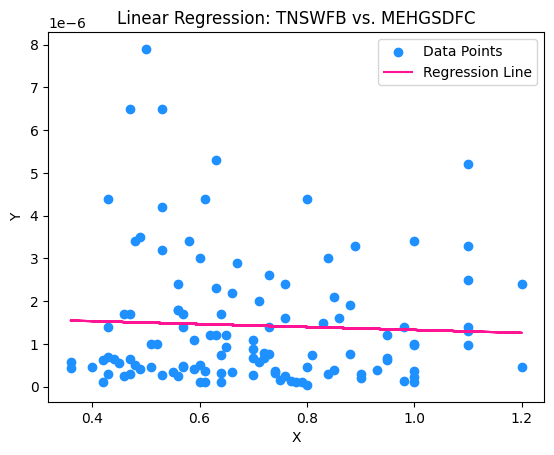

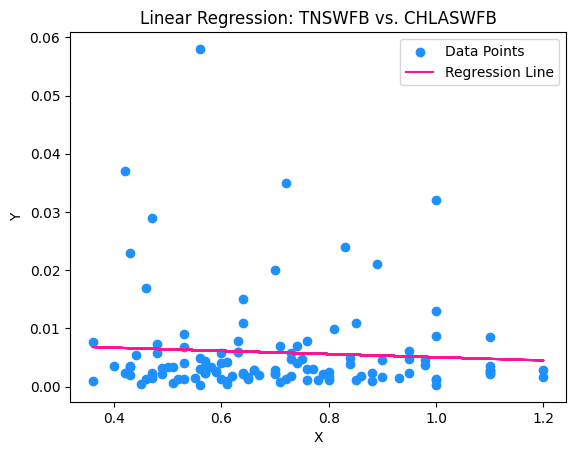

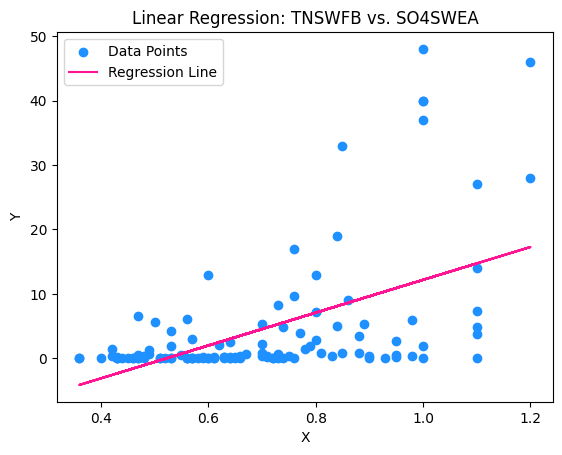

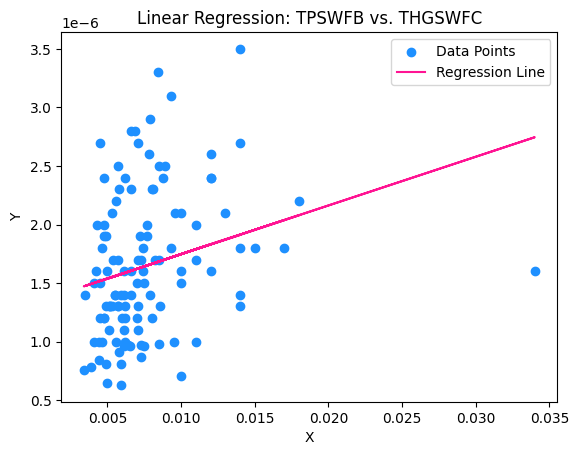

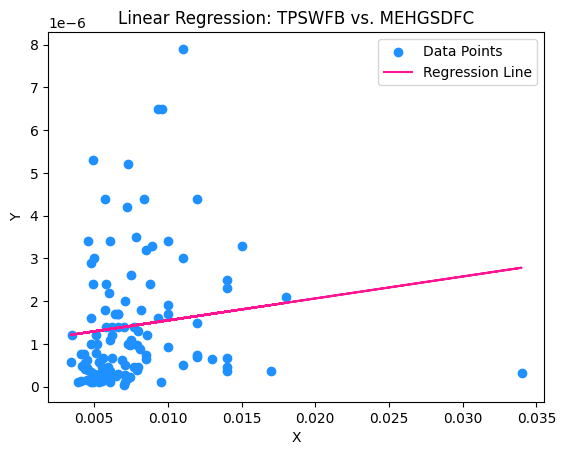

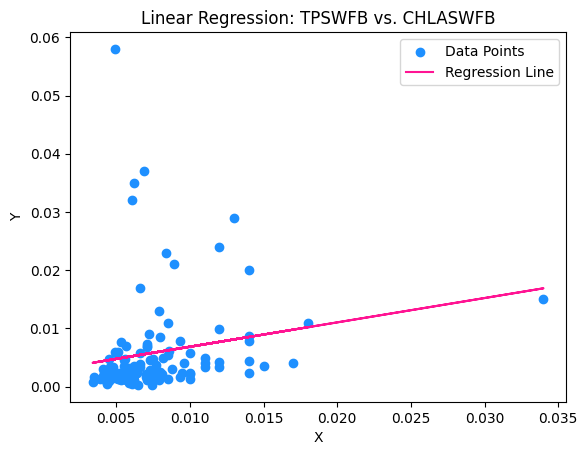

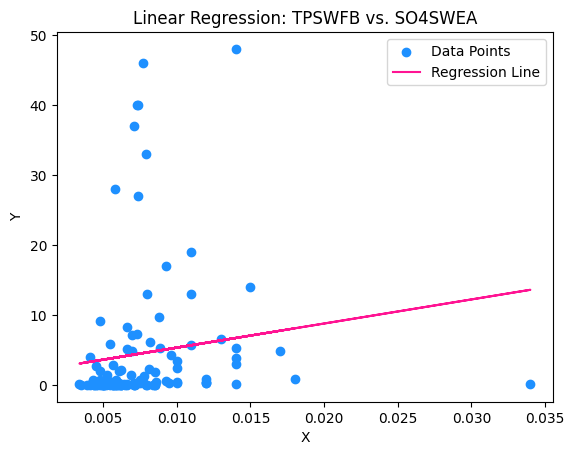

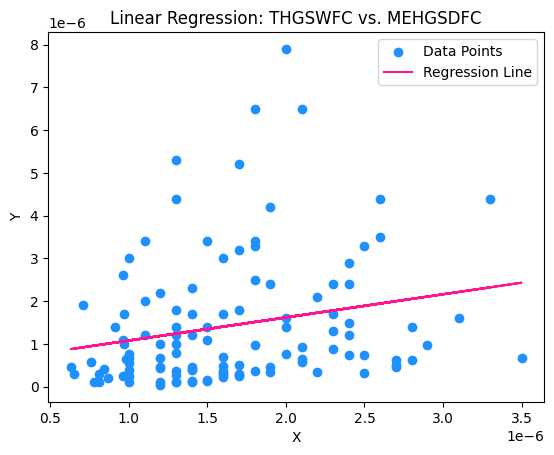

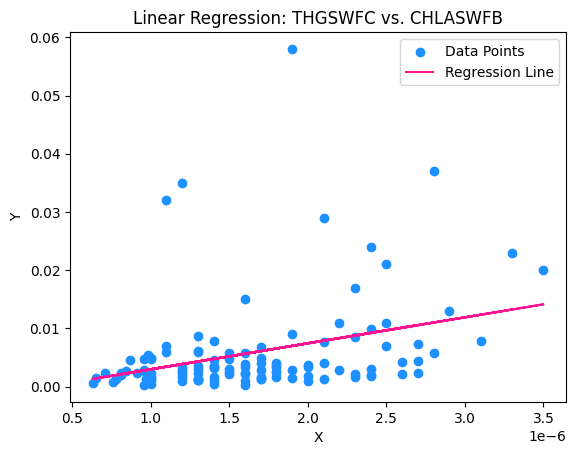

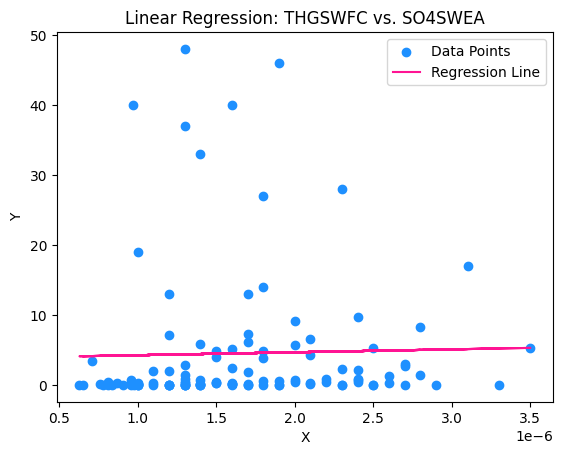

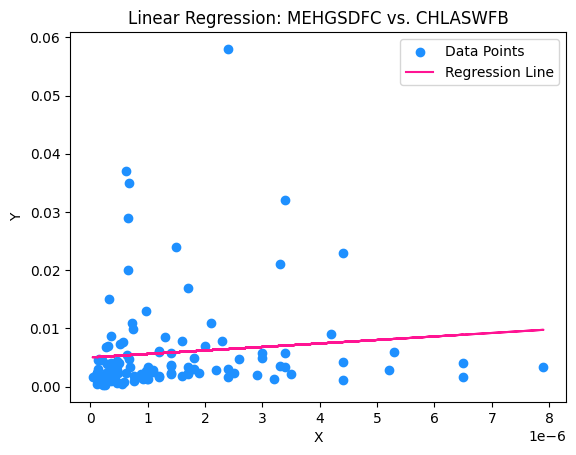

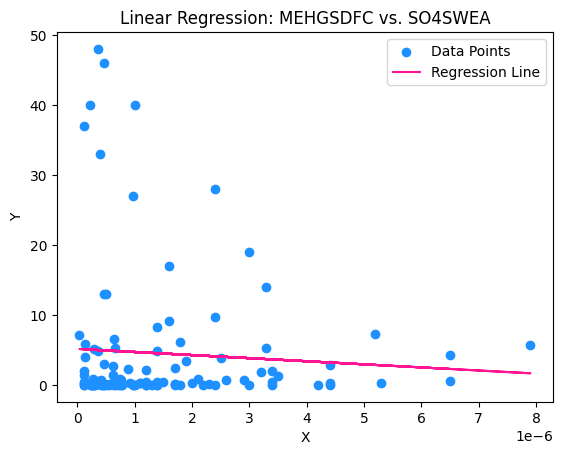

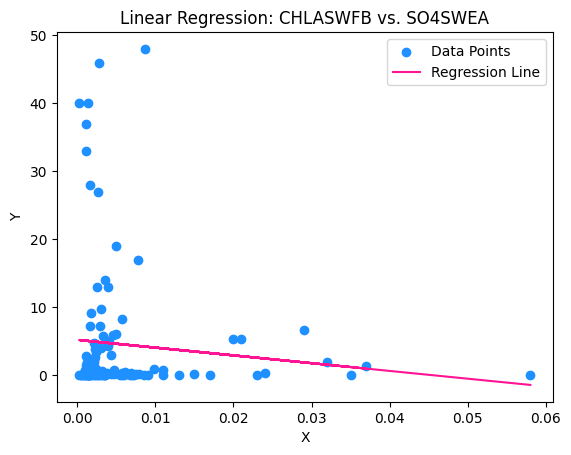

In [5]:
# Linear Regression and Scatter Plots
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

data = rawdata

for i in range(len(var)):
    for j in range(i + 1, len(var)):
        varX = var[i]
        varY = var[j] 
        # Define X and Y
        X = data[[varX]]  # Make sure X is a 2D array
        Y = data[varY]
        # Create and train the model
        model = LinearRegression()
        model.fit(X, Y)
        # Make predictions
        Y_pred = model.predict(X)

        # Plot the data and regression line
        plt.scatter(X, Y, color='dodgerblue', label='Data Points')
        plt.plot(X, Y_pred, color='deeppink', label='Regression Line')
        plt.xlabel('X')
        plt.ylabel('Y')
        plt.title(f"Linear Regression: {varX} vs. {varY}")
        plt.legend()
        plt.show()


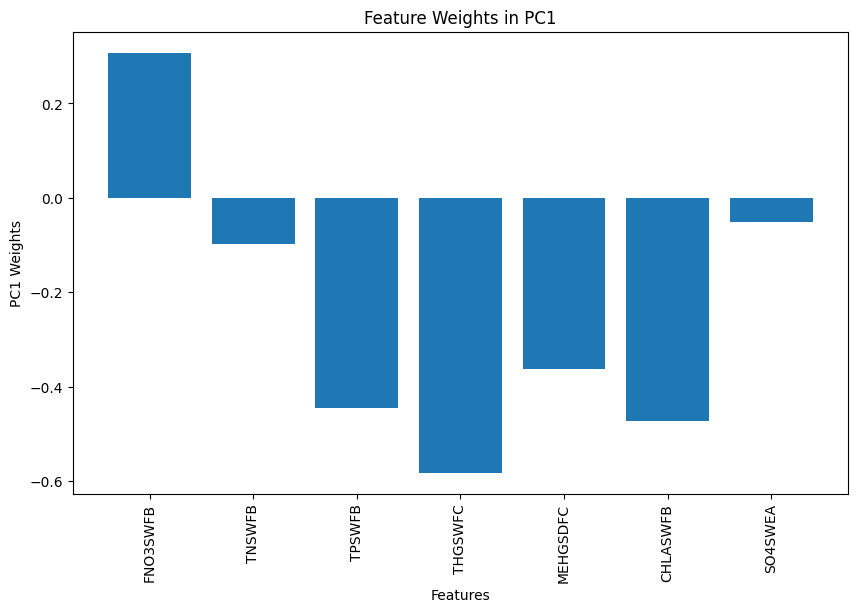

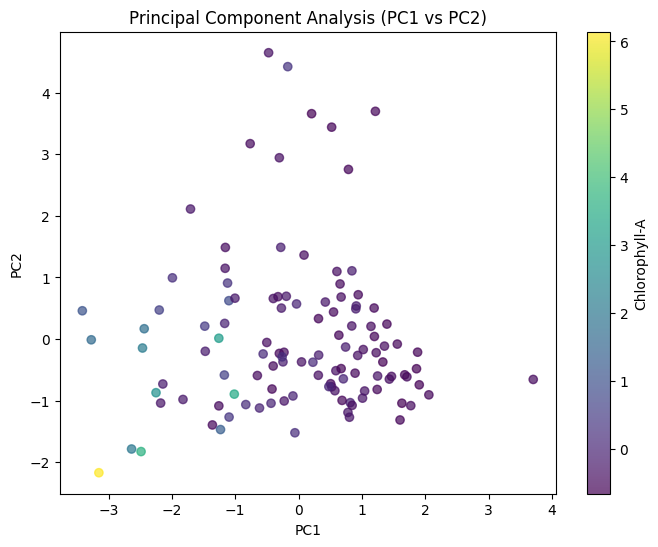

In [25]:
#PCA
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

####change chlorophyll to mg/l
vardata = data[var[:]]

numdata = vardata.select_dtypes(include=[np.number])
#numdata = numdata.dropna()
numdata = numdata.fillna(numdata.mean())
#print(numdata)
numdata = numdata.dropna(axis=1)
    
    
scaler = StandardScaler()
cleandata = scaler.fit_transform(numdata)
cleandatadf = pd.DataFrame(cleandata, columns = numdata.columns)

# start PCA
pca = PCA(n_components=2)

# Fit model to data
principal_components = pca.fit_transform(cleandatadf)

# Plot weights of PC1
components = pca.components_
pc_number = 0  # Index for PC1
weights = components[pc_number]

# Create DataFrame for better visualization
features = cleandatadf.columns
weights_df = pd.DataFrame({'Features': features, 'Weights': weights})

# Plot bar graph of weights
plt.figure(figsize=(10, 6))
plt.bar(weights_df['Features'], weights_df['Weights'])
plt.xlabel('Features')
plt.ylabel('PC1 Weights')
plt.title('Feature Weights in PC1')
plt.xticks(rotation=90)
plt.show()

#Prepare PCA for PC graph
pca = PCA(n_components = 2)
data_pca_fit = pca.fit_transform(cleandatadf)
newdata = cleandatadf
newdata['PC1'] = data_pca_fit[:, 0]
newdata['PC2'] = data_pca_fit[:, 1]
#print(rawdata)

#Plot with color coding
plt.figure(figsize = (8, 6))
plt.scatter(newdata['PC1'], newdata['PC2'], c = newdata['CHLASWFB'], cmap = 'viridis', alpha = 0.7)
plt.colorbar(label = 'Chlorophyll-A')
plt.title('Principal Component Analysis (PC1 vs PC2)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()
